In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
import pandas as pd
# Try reading the CSV file with a different encoding
df = pd.read_csv('Sports analytics.csv', low_memory=False)

In [7]:
# View the first few rows of the dataset
print(df.head())

   game_id  games_competitor_id  games_competitor_age  \
0     17.0                281.0                  19.0   
1     17.0               1561.0                  21.0   
2     17.0               4466.0                  21.0   
3     17.0               5497.0                  32.0   
4     17.0               6578.0                  39.0   

                               event_name  sport_name  games_year  \
0  Gymnastics Men's Individual All-Around  Gymnastics      1948.0   
1  Gymnastics Men's Individual All-Around  Gymnastics      1948.0   
2  Gymnastics Men's Individual All-Around  Gymnastics      1948.0   
3  Gymnastics Men's Individual All-Around  Gymnastics      1948.0   
4  Gymnastics Men's Individual All-Around  Gymnastics      1948.0   

     game_name games_season games_decade game_city medal_name  \
0  1948 Summer       Summer        1940s    London        NaN   
1  1948 Summer       Summer        1940s    London        NaN   
2  1948 Summer       Summer        1940s    Lon

In [9]:
# Get an overview of the dataset
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268154 entries, 0 to 268153
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   game_id               268151 non-null  float64
 1   games_competitor_id   268151 non-null  float64
 2   games_competitor_age  268151 non-null  float64
 3   event_name            268151 non-null  object 
 4   sport_name            268151 non-null  object 
 5   games_year            268151 non-null  float64
 6   game_name             268151 non-null  object 
 7   games_season          268151 non-null  object 
 8   games_decade          268151 non-null  object 
 9   game_city             268151 non-null  object 
 10  medal_name            40537 non-null   object 
 11  person_full_name      268151 non-null  object 
 12  person_gender         268151 non-null  object 
 13  person_height         268151 non-null  float64
 14  person_weight         268151 non-null  float64
 15  

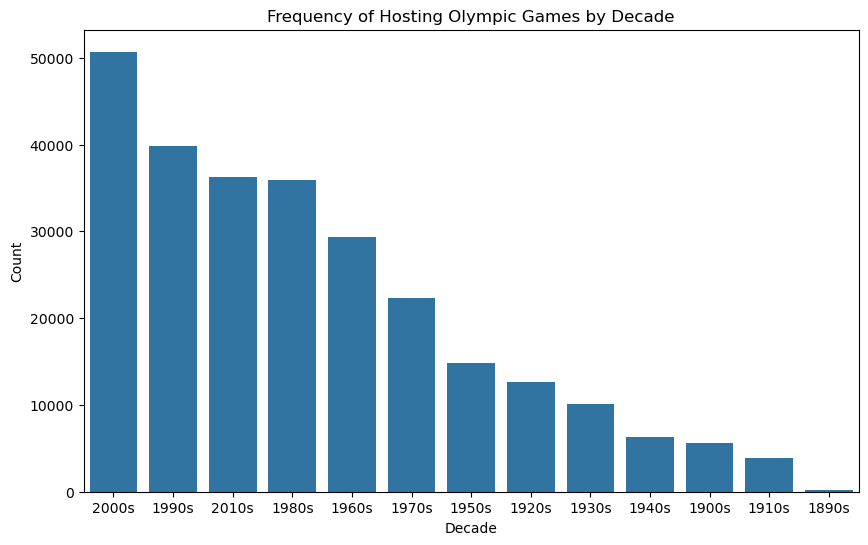

In [13]:
#1.Are there any trends or patterns in the frequency of hosting Olympic Games?
# Explore the frequency of hosting Olympic Games by decade
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
decade_counts = df['games_decade'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=decade_counts.index, y=decade_counts.values)
plt.title('Frequency of Hosting Olympic Games by Decade')
plt.xlabel('Decade')
plt.ylabel('Count')
plt.show()

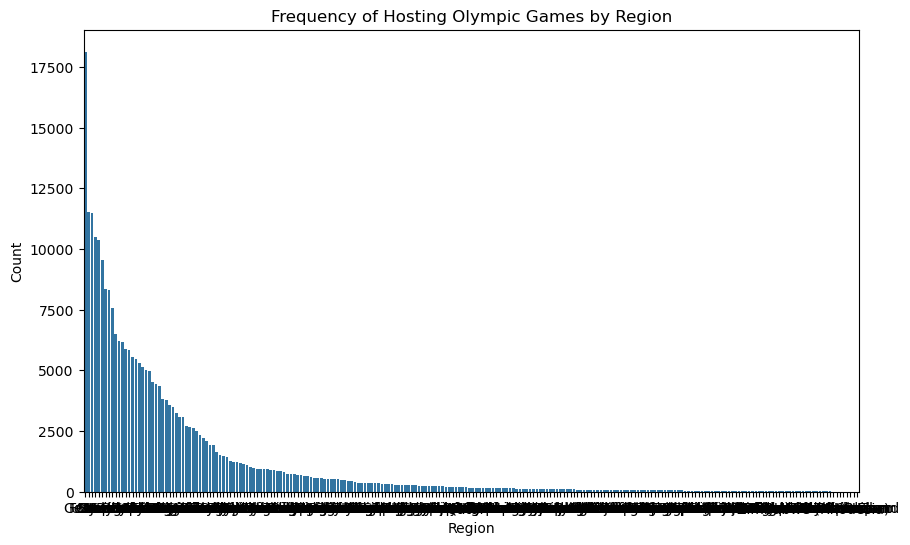

In [15]:
# Explore the frequency of hosting Olympic Games by region
region_counts = df['region_name'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=region_counts.index, y=region_counts.values)
plt.title('Frequency of Hosting Olympic Games by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

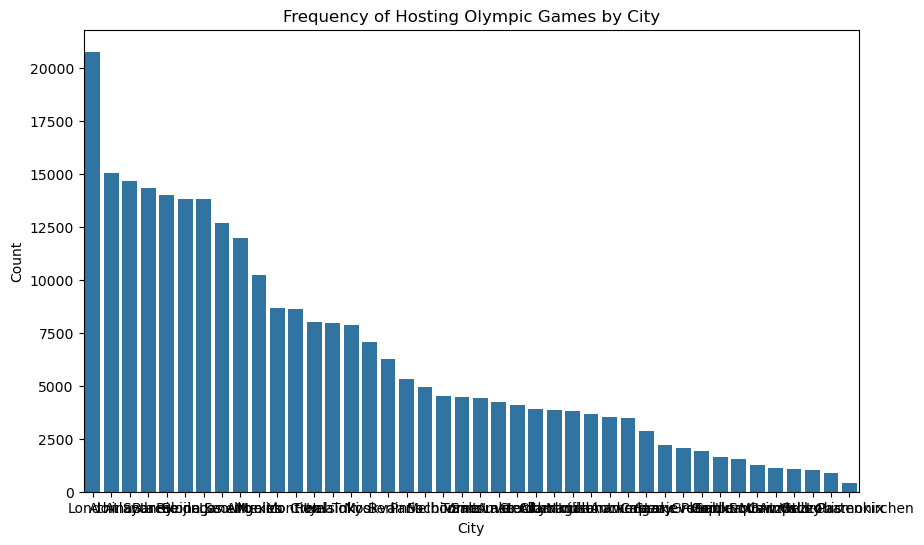

In [17]:
# Explore the frequency of hosting Olympic Games by city
city_counts = df['game_city'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=city_counts.index, y=city_counts.values)
plt.title('Frequency of Hosting Olympic Games by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

In [19]:
#2.How has the duration of Olympic Games changed over time?
# Group the data by Olympic Games edition (games_year) and count the number of events
events_per_edition = df.groupby('games_year')['event_name'].nunique().reset_index()

In [21]:
# Group the data by Olympic Games edition (games_year) and count the number of sports
sports_per_edition = df.groupby('games_year')['sport_name'].nunique().reset_index()

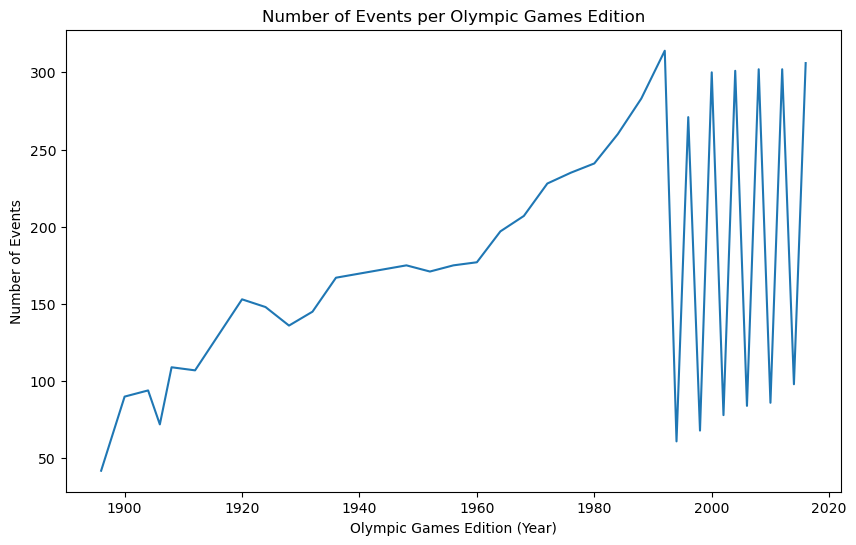

In [23]:
# Plot the number of events per Olympic Games edition
plt.figure(figsize=(10, 6))
plt.plot(events_per_edition['games_year'], events_per_edition['event_name'])
plt.title('Number of Events per Olympic Games Edition')
plt.xlabel('Olympic Games Edition (Year)')
plt.ylabel('Number of Events')
plt.show()


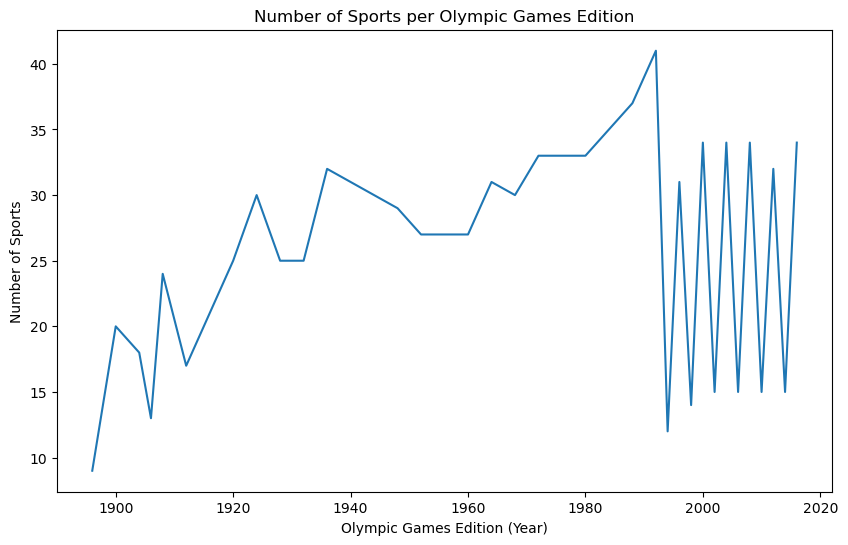

In [25]:
# Plot the number of sports per Olympic Games edition
plt.figure(figsize=(10, 6))
plt.plot(sports_per_edition['games_year'], sports_per_edition['sport_name'])
plt.title('Number of Sports per Olympic Games Edition')
plt.xlabel('Olympic Games Edition (Year)')
plt.ylabel('Number of Sports')
plt.show()


In [27]:
#3.Are there any notable events or occurrences associated with specific Olympic Games?
# Filter the data to include only notable events (e.g., gold medal wins)
notable_events = df[df['medal_name'] == 'Gold']
# Group the data by Olympic Games edition (games_year) and count the number of notable events
notable_events_per_edition = notable_events.groupby('games_year')['event_name'].count().reset_index()
# Sort the data to highlight the top 5 Olympic Games editions with the most notable events
top_5_notable_events = notable_events_per_edition.nlargest(5, 'event_name')
# Print the results
print(top_5_notable_events)

    games_year  event_name
22      1992.0         824
21      1988.0         777
26      2000.0         699
30      2008.0         677
28      2004.0         670


In [29]:
#4.Are there any emerging sports that have been recently added to the Olympics?
# Filter the data to include only recent Olympic Games editions (e.g., 2020 and later)
recent_games = df[df['games_year'] >= 2020]

# Identify emerging sports recently added to the Olympics
emerging_sports = recent_games['sport_name'].unique()

# Print the emerging sports
print(emerging_sports)

# Group the data by emerging sport and count the number of events
emerging_sports_events = recent_games.groupby('sport_name')['event_name'].count().reset_index()

# Sort the data to highlight the emerging sports with the most events
emerging_sports_events = emerging_sports_events.sort_values(by='event_name', ascending=False)

# Print the emerging sports with the most events
print(emerging_sports_events)


[]
Empty DataFrame
Columns: [sport_name, event_name]
Index: []


<Figure size 1200x600 with 0 Axes>

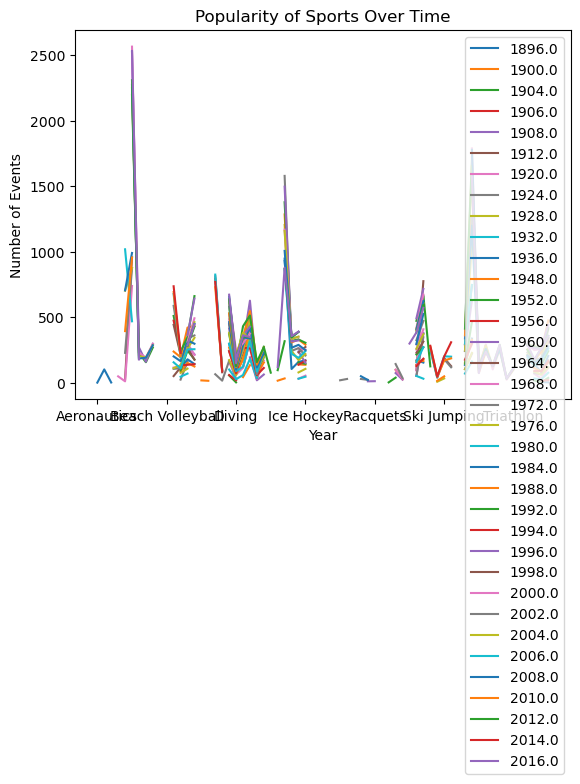

In [31]:
#5.How has the popularity of certain sports changed over the years?
# Group the data by sport_name and games_year, and count the number of events
sport_popularity = df.groupby(['sport_name', 'games_year'])['event_name'].count().reset_index()

# Pivot the data to create a matrix with sports as rows and years as columns
sport_popularity_pivot = sport_popularity.pivot(index='sport_name', columns='games_year', values='event_name')

# Plot the popularity of each sport over time
plt.figure(figsize=(12, 6))
sport_popularity_pivot.plot(kind='line')
plt.title('Popularity of Sports Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.legend(loc='upper right')
plt.show()

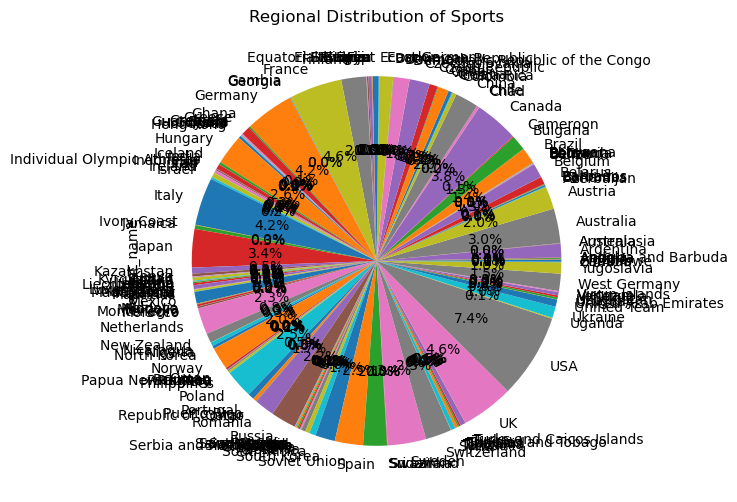

In [46]:
#6.Are there any sports that are specific to a particular region or culture?
# Group the data by region_name and sport_name, and count the number of events
regional_sports = df.groupby(['region_name', 'sport_name'])['event_name'].count().reset_index()

# Filter the data to include only sports with a high regional concentration (> 50% of events in one region)
regional_sports_concentrated = regional_sports[regional_sports['event_name'] > regional_sports['event_name'].mean() * 0.5]

# Plot the regional distribution of sports
plt.figure(figsize=(12, 6))
regional_sports_concentrated.groupby('region_name')['event_name'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title('Regional Distribution of Sports')
plt.show()

person_gender        F        M  gender_difference
sport_name                                        
Athletics      12006.0  26295.0            14289.0
Gymnastics      9149.0  16805.0             7656.0
Cycling         1439.0   8873.0             7434.0
Shooting        1933.0   9229.0             7296.0
Wrestling        314.0   6585.0             6271.0
Fencing         2044.0   8291.0             6247.0
Rowing          2275.0   7975.0             5700.0
Boxing            72.0   5697.0             5625.0
Sailing          946.0   5508.0             4562.0
Football        1009.0   5375.0             4366.0


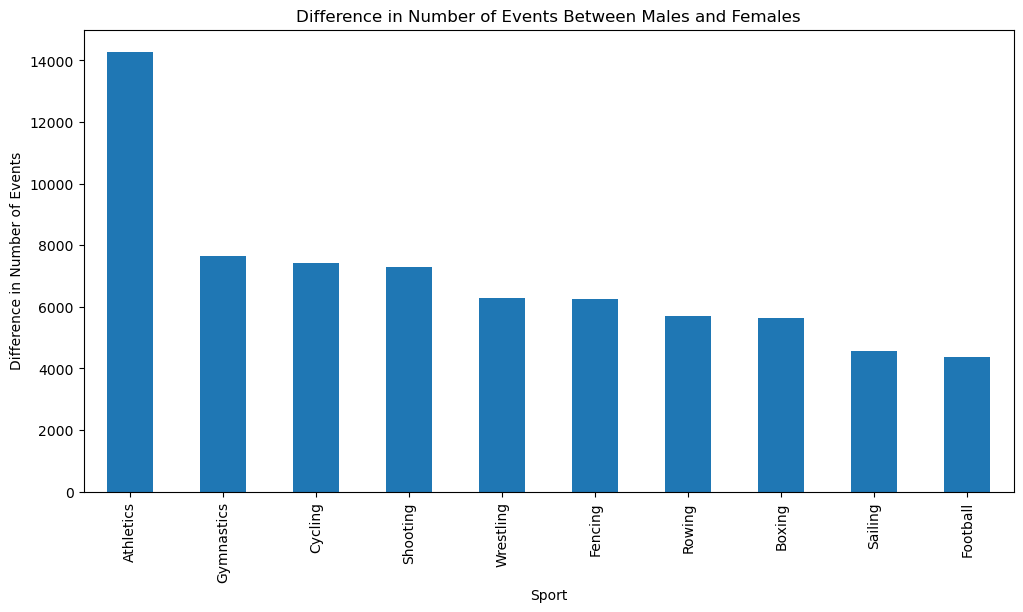

In [48]:
#7.Are there any sports that have a higher number of events for one gender compared to others?

# Group the data by sport_name and person_gender, and count the number of events
gender_events = df.groupby(['sport_name', 'person_gender'])['event_name'].count().reset_index()

# Pivot the data to create a matrix with sports as rows and genders as columns
gender_events_pivot = gender_events.pivot(index='sport_name', columns='person_gender', values='event_name')

# Calculate the difference in the number of events between males and females
gender_events_pivot['gender_difference'] = gender_events_pivot['M'] - gender_events_pivot['F']

# Sort the data by the absolute difference in the number of events
gender_events_pivot = gender_events_pivot.sort_values(by='gender_difference', key=abs, ascending=False)

# Print the top 10 sports with the largest difference in the number of events between males and females
print(gender_events_pivot.head(10))

# Plot the difference in the number of events between males and females for the top 10 sports
plt.figure(figsize=(12, 6))
gender_events_pivot.head(10)['gender_difference'].plot(kind='bar')
plt.title('Difference in Number of Events Between Males and Females')
plt.xlabel('Sport')
plt.ylabel('Difference in Number of Events')
plt.show()


                              event_name  games_year  games_competitor_id
246               Cycling Women's Sprint      2012.0                   19
608          Taekwondo Women's Flyweight      2012.0                   16
228                 Cycling Men's Sprint      2012.0                   17
226  Cycling Men's Road Race, Individual      2012.0                  145
610        Taekwondo Women's Heavyweight      2012.0                   16
..                                   ...         ...                  ...
443              Sailing Mixed Multihull      2016.0                   40
295          Fencing Women's Sabre, Team      2016.0                   30
289             Fencing Men's epee, Team      2016.0                   36
320              Golf Women's Individual      2016.0                   60
319                Golf Men's Individual      2016.0                   59

[410 rows x 3 columns]


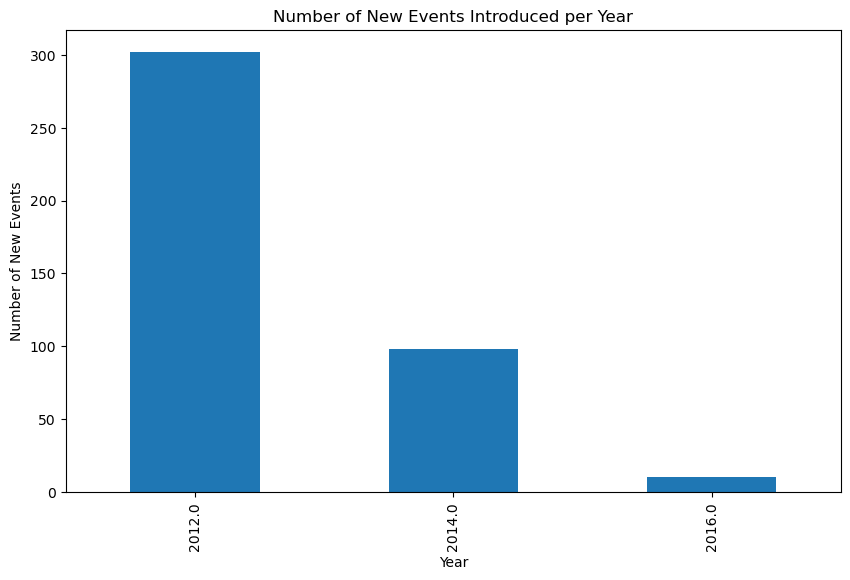

In [50]:
#8.Are there any new events that have been introduced in recent editions of the Olympics?

# Filter the data to include only recent Olympic Games editions (e.g., 2012 and later)
recent_games = df[df['games_year'] >= 2012]

# Group the data by event_name and games_year, and count the number of occurrences
new_events = recent_games.groupby(['event_name', 'games_year'])['games_competitor_id'].count().reset_index()

# Filter the data to include only events that appear for the first time in a given year
new_events = new_events.sort_values(by='games_year').drop_duplicates(subset='event_name', keep='first')

# Print the new events introduced in recent editions of the Olympics
print(new_events)

# Plot the number of new events introduced per year
plt.figure(figsize=(10, 6))
new_events.groupby('games_year')['event_name'].count().plot(kind='bar')
plt.title('Number of New Events Introduced per Year')
plt.xlabel('Year')
plt.ylabel('Number of New Events')
plt.show()


In [54]:
#9.Are there any events that have been discontinued or removed from the Olympics?

# Group the data by event_name and games_year, and count the number of occurrences
event_history = df.groupby(['event_name', 'games_year'])['games_competitor_id'].count().reset_index()

# Filter the data to include only events that have been discontinued (i.e., do not appear in recent games)
discontinued_events = event_history[event_history['games_year'] < 2012]

# Print the discontinued events
print(discontinued_events)




                                     event_name  games_year  \
0                 Aeronautics Mixed Aeronautics      1936.0   
1                  Alpine Skiing Men's Combined      1936.0   
2                  Alpine Skiing Men's Combined      1948.0   
3                  Alpine Skiing Men's Combined      1988.0   
4                  Alpine Skiing Men's Combined      1992.0   
...                                         ...         ...   
6171   Wrestling Women's Heavyweight, Freestyle      2008.0   
6175   Wrestling Women's Lightweight, Freestyle      2004.0   
6176   Wrestling Women's Lightweight, Freestyle      2008.0   
6179  Wrestling Women's Middleweight, Freestyle      2004.0   
6180  Wrestling Women's Middleweight, Freestyle      2008.0   

      games_competitor_id  
0                       1  
1                      65  
2                      77  
3                      58  
4                      67  
...                   ...  
6171                   16  
6175               

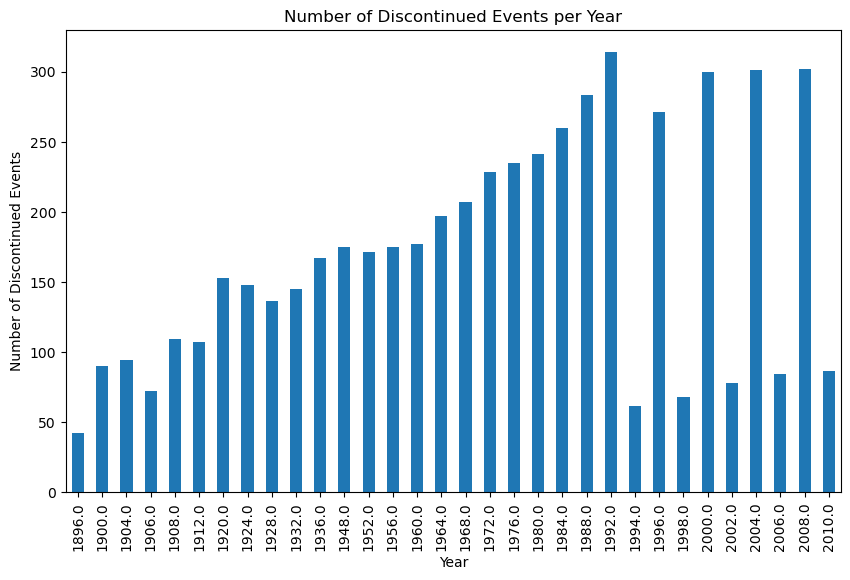

In [58]:
# Plot the number of discontinued events per year
plt.figure(figsize=(10, 6))
discontinued_events.groupby('games_year')['event_name'].count().plot(kind='bar')
plt.title('Number of Discontinued Events per Year')
plt.xlabel('Year')
plt.ylabel('Number of Discontinued Events')
plt.show()



In [94]:
#9.Are there any events that have been discontinued or removed from the Olympics?

# Find the unique events
unique_events = df['event_name'].unique()

# Find the events that appeared in the earliest Olympics
earliest_olympics = df[df['games_year'] == df['games_year'].min()]
earliest_events = earliest_olympics['event_name'].unique()

# Find the discontinued events
discontinued_events = set(unique_events) - set(earliest_events)

# Print the discontinued events
print("Discontinued Events:")
for event in discontinued_events:
    print(event)

Discontinued Events:
Basketball Men's Basketball
Athletics Men's Discus Throw, Greek Style
Cycling Men's Team Sprint
Cycling Men's 50 kilometres
Shooting Men's Dueling Pistol, 30 metres
Gymnastics Women's Floor Exercise
Sailing Women's Skiff
Sailing Mixed Skiff
Canoeing Men's Folding Kayak Doubles, 10 kilometres
Shooting Men's Free Pistol, 50 yards
Athletics Men's Pentathlon
Rowing Women's Coxless Pairs
Athletics Men's 2,590 metres Steeplechase
Fencing Men's Sabre, Team
Cross Country Skiing Men's Team Sprint
Cycling Women's Individual Time Trial
Cross Country Skiing Men's 30 km Skiathlon
Athletics Men's 3,000 metres, Team
Swimming Men's 200 metres Butterfly
Judo Men's Half-Lightweight
Art Competitions Mixed Painting, Unknown Event
Cycling Women's Individual Pursuit, 3,000 metres
Swimming Women's 50 metres Freestyle
Swimming Women's 100 metres Backstroke
Canoeing Men's Canadian Singles, 10,000 metres
Weightlifting Men's All-Around Dumbbell Contest
Equestrianism Men's Three-Day Event, Te

In [100]:
#10.Are there any notable trends in the height and weight of participants over time?

# Calculate mean height and weight per decade
decade_height = df.groupby('games_decade')['person_height'].mean().reset_index()
decade_weight = df.groupby('games_decade')['person_weight'].mean().reset_index()

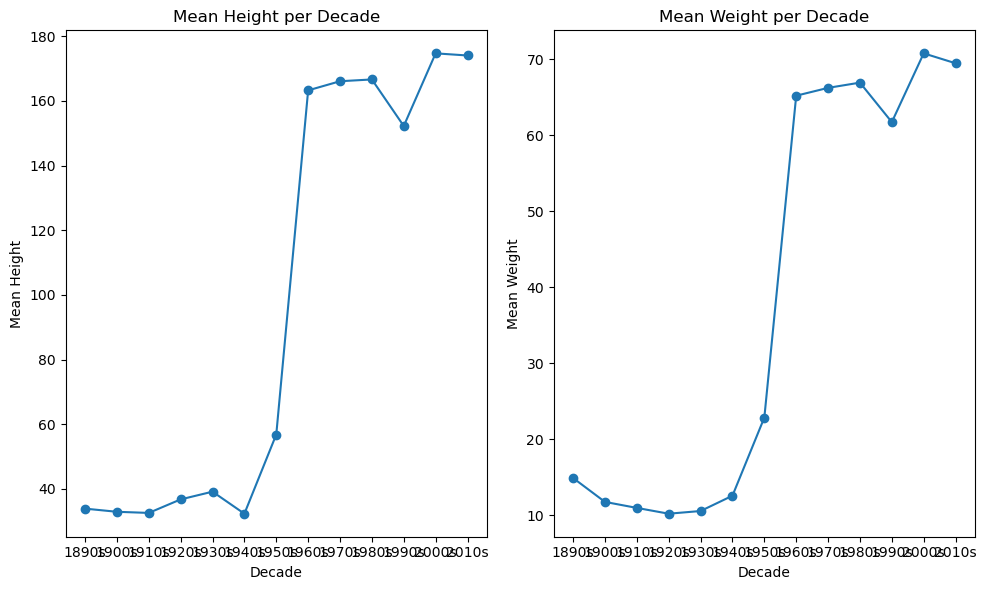

In [98]:
# Plot the trends
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(decade_height['games_decade'], decade_height['person_height'], marker='o')
plt.title('Mean Height per Decade')
plt.xlabel('Decade')
plt.ylabel('Mean Height')

plt.subplot(1, 2, 2)
plt.plot(decade_weight['games_decade'], decade_weight['person_weight'], marker='o')
plt.title('Mean Weight per Decade')
plt.xlabel('Decade')
plt.ylabel('Mean Weight')

plt.tight_layout()
plt.show()

In [102]:
#11.Are there any dominant countries or regions in specific sports or events?

# Group by sport and region, and count the number of medals
medal_count = df.groupby(['sport_name', 'region_name'])['medal_name'].count().reset_index()

In [104]:
# Filter the top 5 regions for each sport
top_regions = medal_count.loc[medal_count.groupby('sport_name')['medal_name'].rank(method='dense', ascending=False) <= 5]

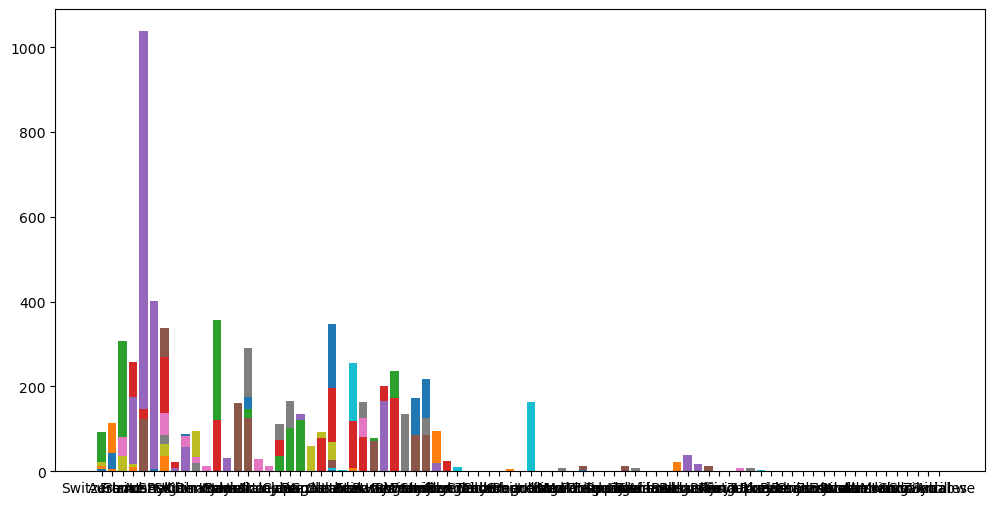

In [106]:
# Plot the top regions for each sport
plt.figure(figsize=(12, 6))
for sport in top_regions['sport_name'].unique():
    sport_data = top_regions[top_regions['sport_name'] == sport]
    plt.bar(sport_data['region_name'], sport_data['medal_name'], label=sport)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


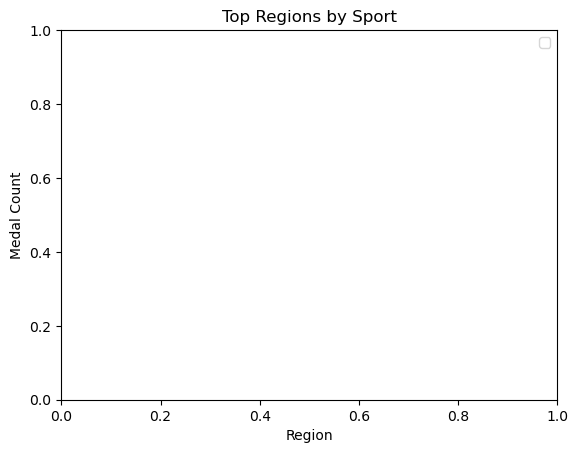

In [108]:
plt.title('Top Regions by Sport')
plt.xlabel('Region')
plt.ylabel('Medal Count')
plt.legend()
plt.show()

In [110]:
12.What factors contribute to the success or performance of participants from different countries?

# Group by region and calculate the number of medals
medals_per_region = df.groupby('region_name')['medal_name'].count().reset_index()

Object `countries` not found.


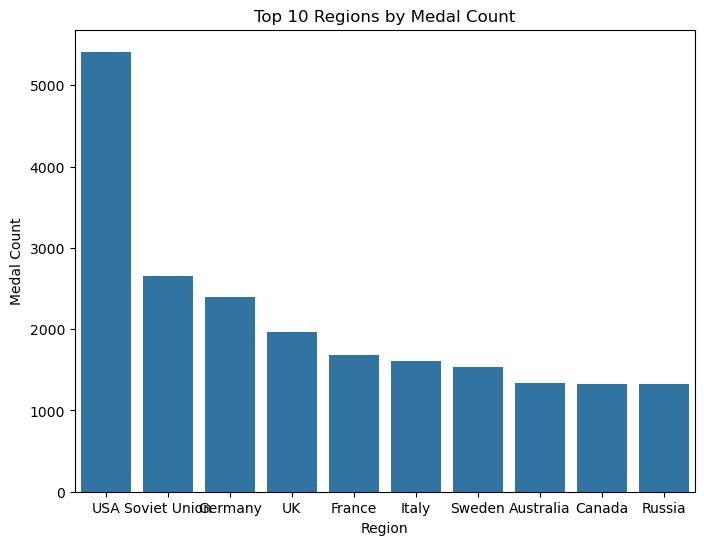

In [112]:
# Plot the top 10 regions by medal count
plt.figure(figsize=(8, 6))
sns.barplot(x='region_name', y='medal_name', data=medals_per_region.nlargest(10, 'medal_name'))
plt.title('Top 10 Regions by Medal Count')
plt.xlabel('Region')
plt.ylabel('Medal Count')
plt.show()

In [114]:
# Group by region and calculate the average height and weight
avg_height_weight = df.groupby('region_name')[['person_height', 'person_weight']].mean().reset_index()

# Plot the relationship between average height/weight and medal count
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0, 0.5, 'Medal Count')

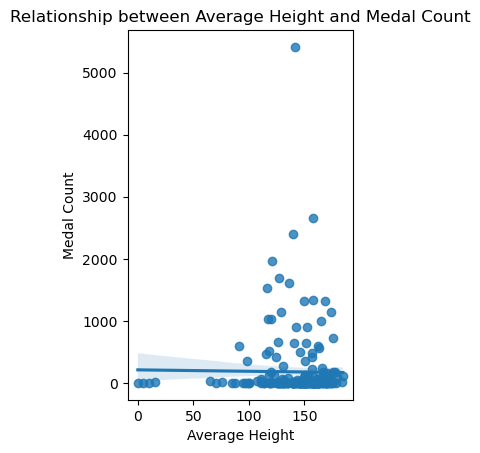

In [116]:
plt.subplot(1, 2, 1)
sns.regplot(x='person_height', y='medal_name', data=avg_height_weight.merge(medals_per_region, on='region_name'))
plt.title('Relationship between Average Height and Medal Count')
plt.xlabel('Average Height')
plt.ylabel('Medal Count')

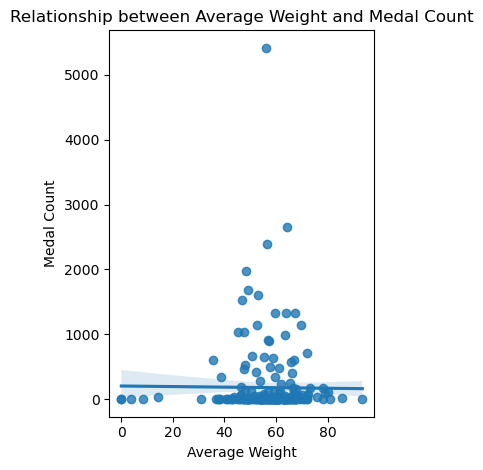

In [118]:
plt.subplot(1, 2, 2)
sns.regplot(x='person_weight', y='medal_name', data=avg_height_weight.merge(medals_per_region, on='region_name'))
plt.title('Relationship between Average Weight and Medal Count')
plt.xlabel('Average Weight')
plt.ylabel('Medal Count')

plt.tight_layout()
plt.show()

In [126]:
#13.Are there any countries that consistently perform well in multiple Olympic editions?
#Group by region and games_year, and count the number of medals
medal_count = df.groupby(['region_name', 'games_year'])['medal_name'].count().reset_index()
# Filter countries with at least 10 medals in multiple Olympic editions
consistent_performers = medal_count[medal_count.groupby('region_name')['medal_name'].transform('sum') >= 10]

# Print the top 5 consistent performers
print("Top 5 Consistent Performers:")
print(consistent_performers['region_name'].value_counts().head(5))

Top 5 Consistent Performers:
region_name
UK             35
Australia      35
Greece         35
Switzerland    35
USA            35
Name: count, dtype: int64


In [128]:
#14.Are there any sports or events that have a higher number of medalists from a specific region?

 #Group by sport, event, and region, and count the number of medalists
medalist_count = df.groupby(['sport_name', 'event_name', 'region_name'])['person_id'].count().reset_index()

# Filter sports/events with a high concentration of medalists from a specific region
high_concentration = medalist_count[medalist_count.groupby(['sport_name', 'event_name'])['person_id'].rank(method='dense', ascending=False) <= 2]

# Print the top 5 sports/events with a high concentration of medalists from a specific region
print("Top 5 Sports/Events with High Concentration of Medalists from a Specific Region:")
print(high_concentration.groupby(['sport_name', 'event_name'])['person_id'].sum().sort_values(ascending=False).head(5))

Top 5 Sports/Events with High Concentration of Medalists from a Specific Region:
sport_name  event_name                 
Ice Hockey  Ice Hockey Men's Ice Hockey    762
Hockey      Hockey Men's Hockey            610
Water Polo  Water Polo Men's Water Polo    500
Football    Football Men's Football        443
Rowing      Rowing Men's Coxed Eights      430
Name: person_id, dtype: int64


In [130]:
#15.What are some notable instances of unexpected or surprising medal wins?

# Filter medal wins by competitors from regions with fewer than 10 medals
surprising_wins = df[(df['medal_name'].notnull()) & (df.groupby('region_name')['medal_name'].transform('count') < 10)]

# Print the top 5 surprising medal wins
print("Top 5 Surprising Medal Wins:")
print(surprising_wins[['person_full_name', 'region_name', 'sport_name', 'event_name', 'games_year']].head(5))

Top 5 Surprising Medal Wins:
                       person_full_name region_name sport_name  \
227796         Claudia Mara Poll Ahrens  Costa Rica   Swimming   
227797         Claudia Mara Poll Ahrens  Costa Rica   Swimming   
227995  Kameradin Susanthika Jayasinghe   Sri Lanka  Athletics   
228035           Mirela Maniani-Tzelili     Albania  Athletics   
228137                      Trn Hiu Ngn     Vietnam  Taekwondo   

                                   event_name  games_year  
227796  Swimming Women's 200 metres Freestyle      2000.0  
227797  Swimming Women's 400 metres Freestyle      2000.0  
227995           Athletics Women's 200 metres      2000.0  
228035        Athletics Women's Javelin Throw      2000.0  
228137        Taekwondo Women's Featherweight      2000.0  


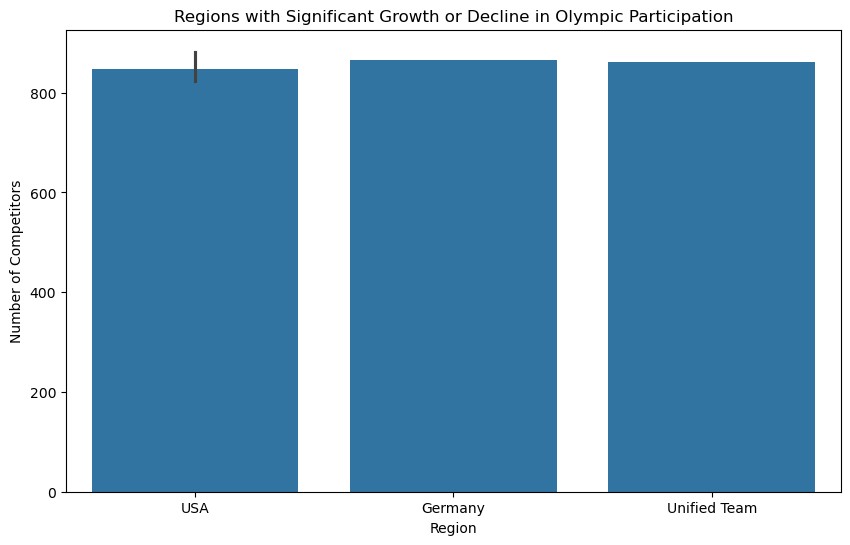

In [136]:
#16.Are there any regions that have experienced significant growth or decline in Olympic participation?

# Group by region and games_year, and count the number of competitors
competitor_count = df.groupby(['region_name', 'games_year'])['games_competitor_id'].count().reset_index()

# Calculate the percentage change in competitors for each region
pct_change = competitor_count.groupby('region_name')['games_competitor_id'].pct_change().reset_index()

# Filter regions with significant growth or decline (e.g., > 50% change)
significant_change = competitor_count[pct_change['games_competitor_id'] > 0.5]

# Plot the top 5 regions with significant growth or decline
plt.figure(figsize=(10, 6))
sns.barplot(x='region_name', y='games_competitor_id', data=significant_change.nlargest(5, 'games_competitor_id'))
plt.title('Regions with Significant Growth or Decline in Olympic Participation')
plt.xlabel('Region')
plt.ylabel('Number of Competitors')
plt.show()

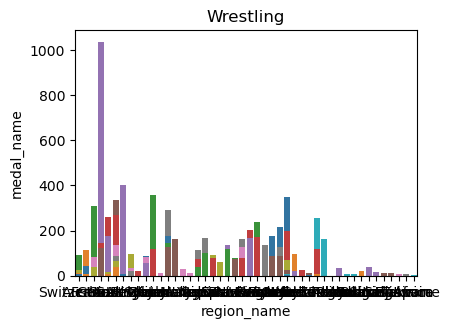

In [144]:
#18.How do cultural or geographical factors influence the performance of regions in specific sports?

# Group by sport and region, and count the number of medals
medal_count = df.groupby(['sport_name', 'region_name'])['medal_name'].count().reset_index()

# Plot the top 5 regions for each sport
plt.figure(figsize=(12, 6))
for sport in medal_count['sport_name'].unique():
    sport_data = medal_count[medal_count['sport_name'] == sport]
    plt.subplot(2, 3, sport_data['sport_name'].unique().tolist().index(sport) + 1)
    sns.barplot(x='region_name', y='medal_name', data=sport_data.nlargest(5, 'medal_name'))
    plt.title(sport)

plt.tight_layout()
plt.show()

In [148]:
#18.Are there any regions that have had a notable impact on the overall medal tally?

# Group by region and count the total number of medals
medal_tally = df.groupby('region_name')['medal_name'].count().reset_index()

# Calculate the percentage of total medals for each region
medal_tally['percentage'] = (medal_tally['medal_name'] / medal_tally['medal_name'].sum()) * 100

# Filter regions with a notable impact (> 5% of total medals)
notable_regions = medal_tally[medal_tally['percentage'] > 5]

# Print the notable regions
print("Regions with a Notable Impact on the Overall Medal Tally:")
print(notable_regions)

Regions with a Notable Impact on the Overall Medal Tally:
      region_name  medal_name  percentage
71        Germany        2395    5.908183
185  Soviet Union        2658    6.556973
208           USA        5414   13.355700
